In [1]:
import os
import numpy as np
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

train_path = 'C:\\Users\\tomto\\Downloads\\fruits\\fruits-360\\Test'
test_path = 'C:\\Users\\tomto\\Downloads\\fruits\\fruits-360\\Training'

train_labels = os.listdir(train_path)
test_labels = os.listdir(test_path)
train_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_data = train_generator.flow_from_directory(train_path, batch_size=32, classes=train_labels, target_size=(64,64))
test_data = test_generator.flow_from_directory(test_path, batch_size=32, classes=train_labels, target_size=(64,64))


Using TensorFlow backend.


Found 1872 images belonging to 11 classes.
Found 5606 images belonging to 11 classes.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

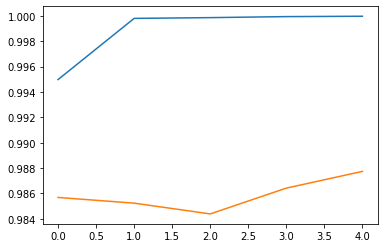

In [2]:
cnn = Sequential()

cnn.add(Conv2D(16, (3, 3), input_shape = (64, 64, 3), padding = "same", activation = "relu"))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(32, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Flatten())

cnn.add(Dropout(0.25))

cnn.add(Dense(256, activation = "relu"))
cnn.add(Dense(len(train_labels), activation = "sigmoid"))
# cnn.add(Dense(len(train_labels), activation = "softmax"))

# cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

#GPU設定
#如果要用CPU也是可以但會慢很多
os.environ["CUDA_VISIBLE_DEVICES"]="0"
with tf.device('/GPU:0'):
    history = cnn.fit(
        train_data, 
        steps_per_epoch=1000, 
        epochs=5, 
        validation_steps=400, 
        validation_data=test_data)
    


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

score = cnn.evaluate(test_data)

cnn.save("cnn_model.h5")


In [3]:
#pred
from keras.models import load_model
import numpy as np
from keras.preprocessing import image


model = load_model('cnn_model.h5')
# model.summary()

test_img_path = 'bbb.jpg'
test_img_path1 = 'ccc.jpg'
test_img_path2 = 'ppp.jpg'

img_pred = image.load_img(test_img_path2, target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = model.predict(img_pred)

if rslt[0][0] == 1:
    prediction = "Apple Red 2"
    print('蘋果')
    
elif rslt[0][1] == 1:
    prediction = "Apricot"
    print('桃子')
    
elif rslt[0][2] == 1:
    prediction = "Banana Lady Finger"
    print('香蕉')

elif rslt[0][3] == 1:
    prediction = "Cantaloupe 1"
    print('檸檬')
    
elif rslt[0][4] == 1:
    prediction = "Carambula"
    print('楊桃')
    
elif rslt[0][5] == 1:
    prediction = "Cherry 2"
    print('櫻桃')
    
elif rslt[0][6] == 1:
    prediction = "Corn"
    print('玉米')
    
elif rslt[0][7] == 1:
    prediction = "Ginger Root"
    print('薑')
    
elif rslt[0][8] == 1:
    prediction = "Strawberry Wedge"
    print('草莓')
    
elif rslt[0][9] == 1:
    prediction = "Tomato Cherry Red"
    print('番茄')
    
elif rslt[0][10] == 1:
    prediction = "Watermelon"
    print('西瓜')


薑


In [ ]:
import coremltools
from keras.models import load_model
model = load_model('cnn_model1.h5')
coreml_model = coremltools.converters.keras.convert(model, input_names=['image'], output_names=['output'],image_input_names='image')
coreml_model.author = 'jed'
coreml_model.short_description = 'furit'
coreml_model.input_description['image'] = '64*64 image'
coreml_model.output_description['output'] = 'Apple Red 2, Apricot, Banana Lady Finger, Cantaloupe 1, Carambula,Cherry 2,Corn, Ginger   Root, Strawberry Wedge,Tomato Cherry Red,Watermelon'
coreml_model.save('xx.mlmodel')